In [37]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# read dataset
dataframe = pd.read_csv("Jamboree_Admission.csv")

# Basic data cleaning and exploration

In [39]:
dataframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
dataframe.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## EDA:
#### Range of Serial No. is 1 to 500. i.e. Unique Row Values.
#### Range of GRE Score is 290 to 340.
#### Range of TOEFL Score is 92 to 120.
#### Range of CGPA is 6.8 to 9.92.
#### Range of University Rating(Catagorical) is 1 to 5.
#### Range of SOP and LOR (Catagorical) is 1 to 5.

## The dataset has been thoroughly examined, revealing the absence of outliers. All data points fall within the expected range, ensuring the integrity and reliability of the dataset.


In [41]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [42]:
# Checking NA values
dataframe.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

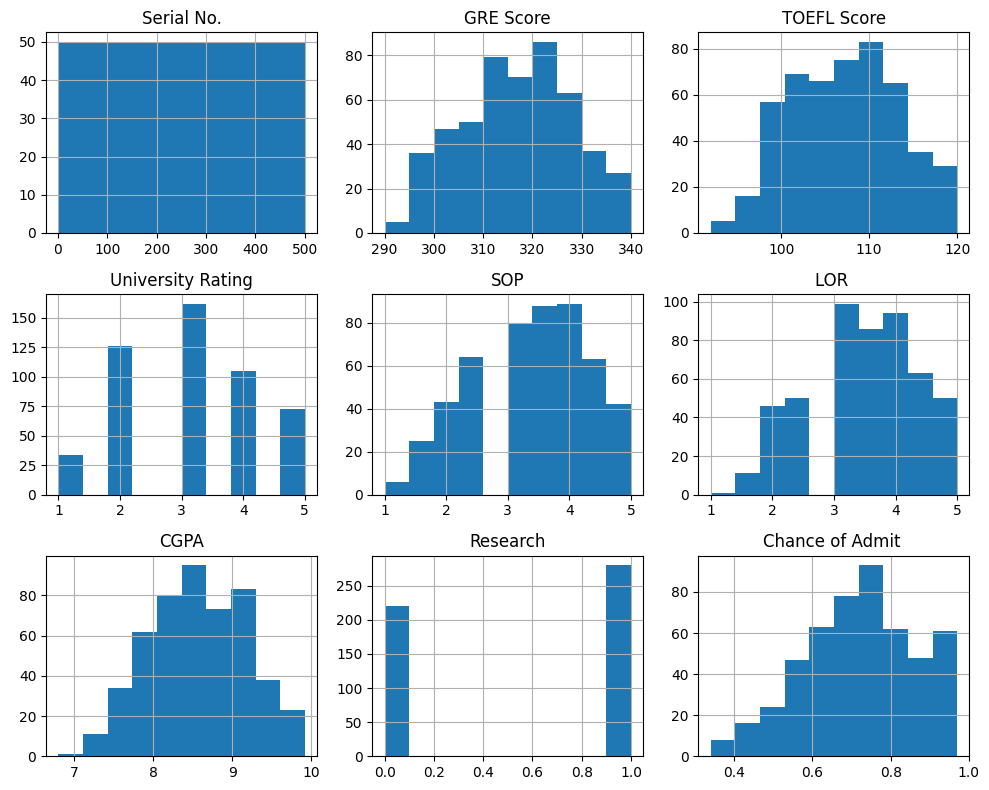

In [43]:
# Visualizing the distribution of numerical variables
dataframe.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [44]:
dataframe.nunique()


Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [45]:
# Assuming in 'dataframe' serial_no. has unique ids
dataframe.drop(columns=['Serial No.'], inplace=True)

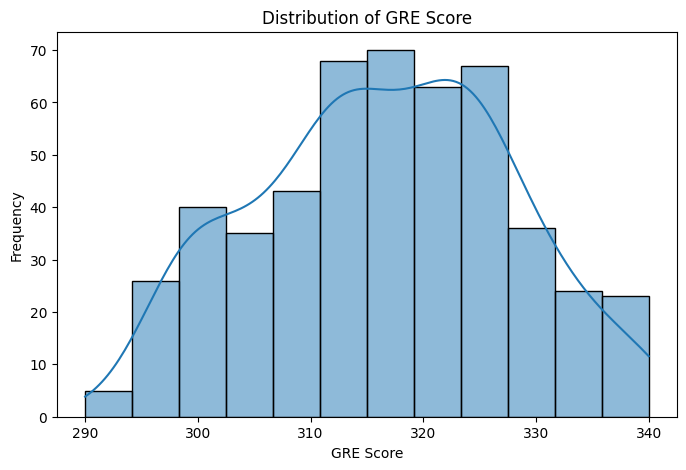

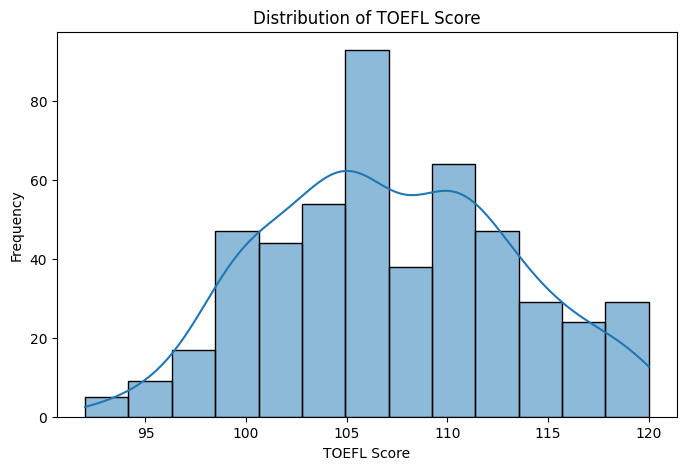

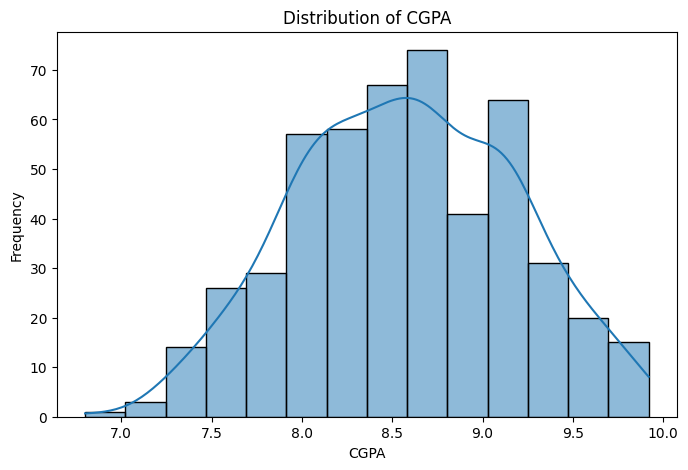

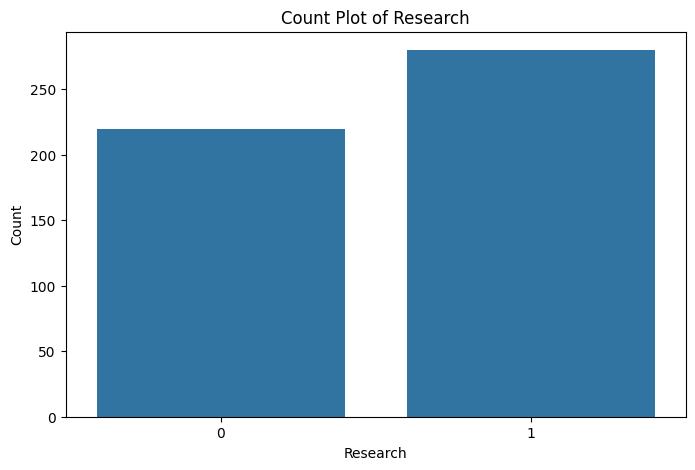

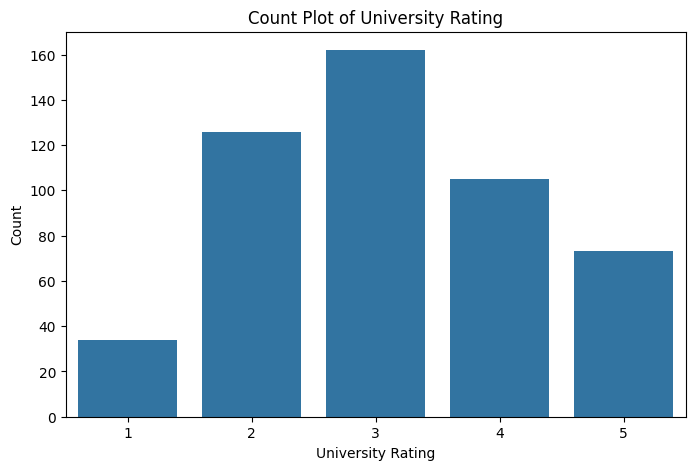

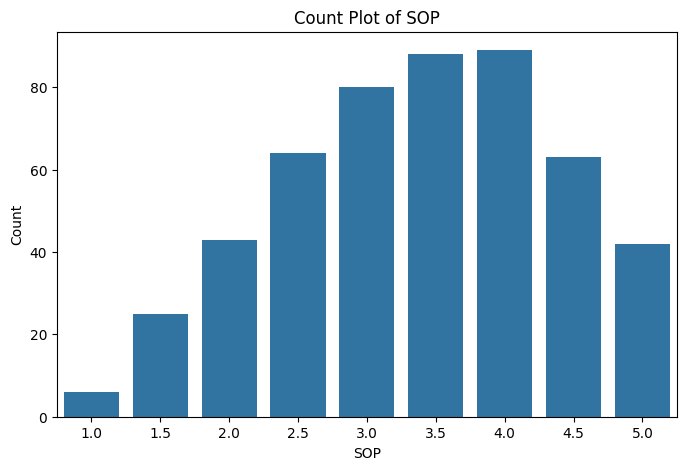

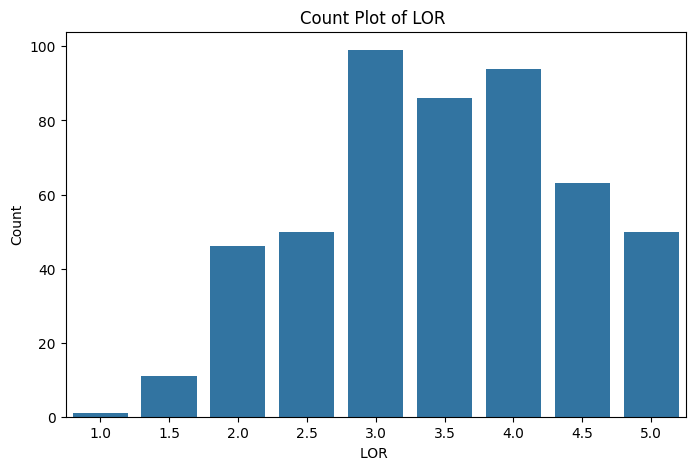

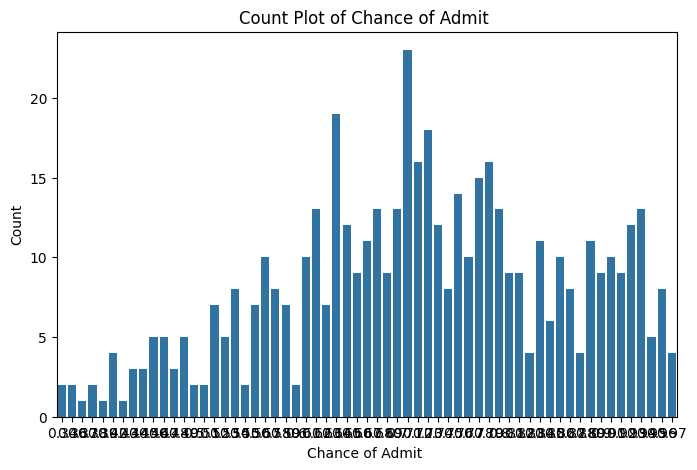

In [46]:
import seaborn as sns
# Univariate analysis for continuous variables (distribution plots)
continuous_vars = ['GRE Score', 'TOEFL Score', 'CGPA']
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataframe[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical variables (bar plots/count plots)
categorical_vars = ['Research', 'University Rating','SOP', 'LOR ', 'Chance of Admit ']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataframe
                  , x=var)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

##EDA
#### The attributes GRE Scores, TOEFL Scores, University Rating, CGPA, SOP, and LOR exhibit a normal distribution pattern, indicating that the majority of observations cluster around the mean, with symmetric tails on either side. This distributional characteristic suggests a balanced distribution of values across the dataset, aligning with typical expectations for these attributes.

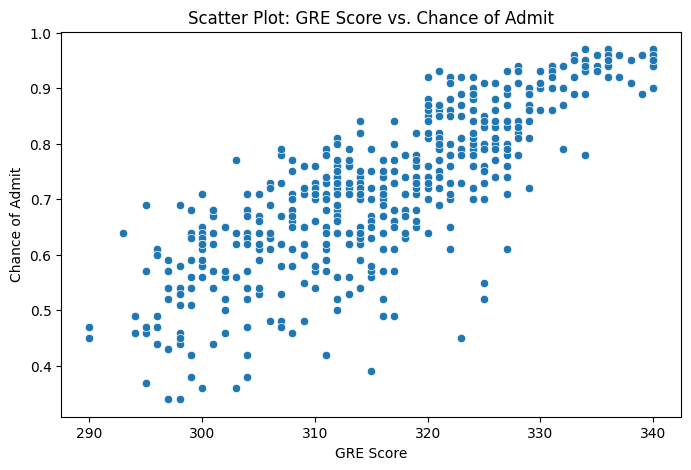

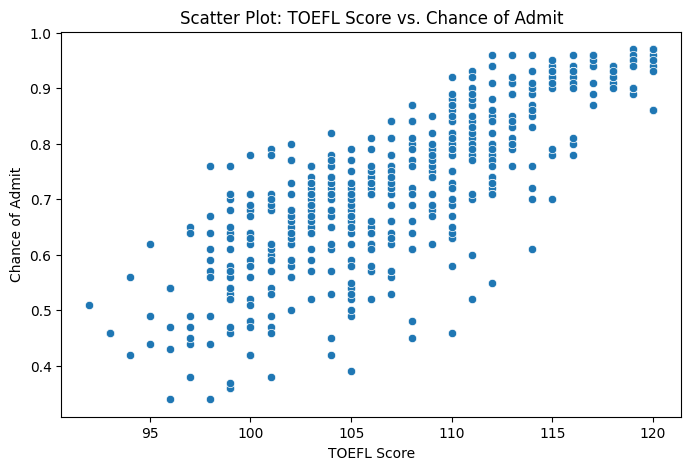

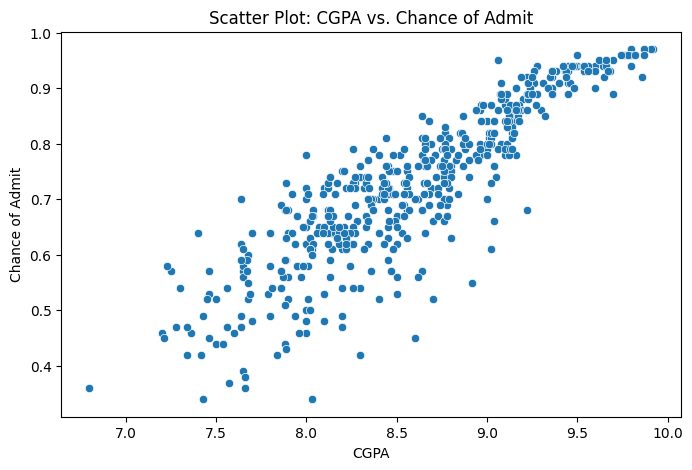

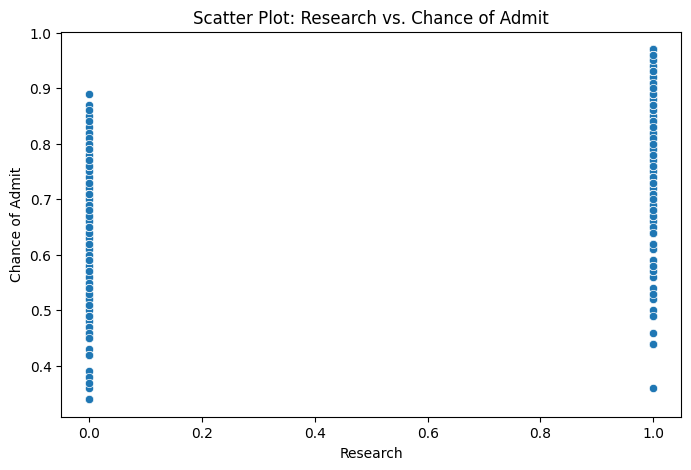

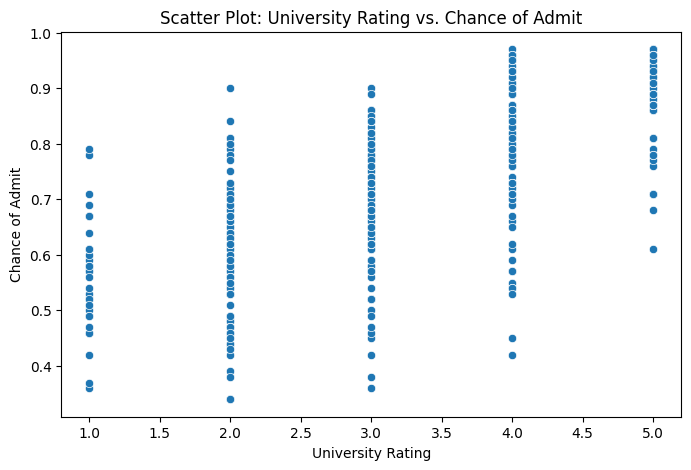

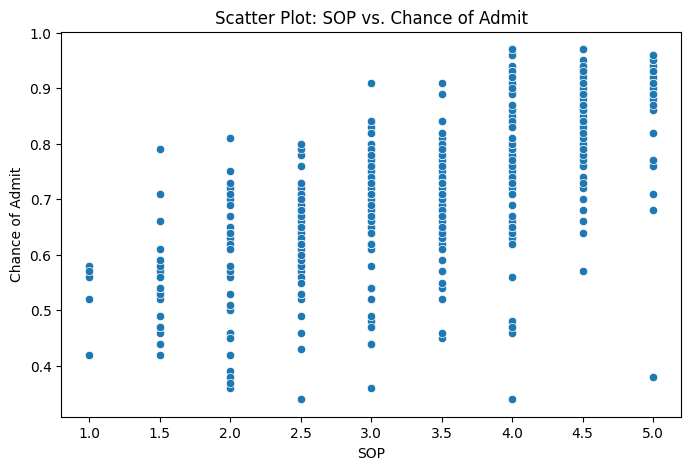

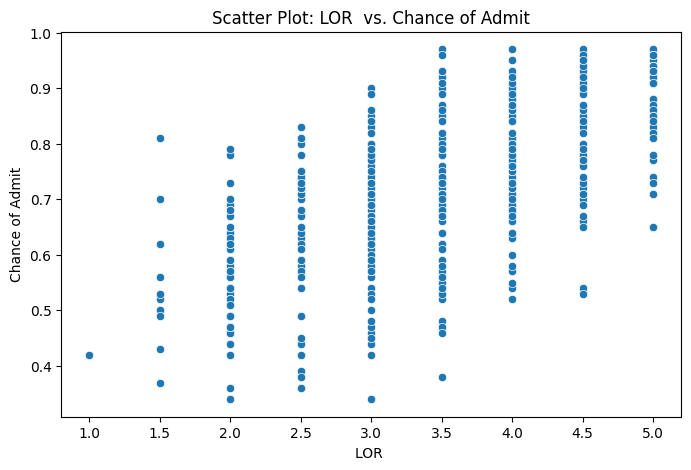

In [47]:
#Bivariate Analysis '
for var in continuous_vars+categorical_vars[:-1]:
    if var=='Reaseach':
      continue
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=dataframe, x=var, y='Chance of Admit ')
    plt.title(f'Scatter Plot: {var} vs. Chance of Admit')
    plt.xlabel(var)
    plt.ylabel('Chance of Admit')
    plt.show()



*   As the GRE score increases, there seems to be a positive trend in the 'Chance of Admit'. Higher GRE scores are associated with higher chances of admission.
*   Similar to the GRE score, higher TOEFL scores appear to correlate with higher chances of admission. There is a positive relationship between TOEFL scores and the 'Chance of Admit'.


*   There is a noticeable positive relationship between CGPA and the 'Chance of Admit'. Higher CGPA scores correspond to higher chances of admission.
*   The scatter plot suggests that there may be a positive relationship between the Statement of Purpose (SOP) score and the 'Chance of Admit'. Students with stronger SOP scores tend to have higher chances of admission.




*   Similarly, there appears to be a positive correlation between the Letter of Recommendation (LOR) score and the 'Chance of Admit'. Higher LOR scores are associated with higher chances of admission.
*   It is seen that students with research experience are more likely to be admitted compared to those without research experience.









#Data Preprocessing

In [48]:
#Duplicate value check
duplicate_rows = dataframe[dataframe.duplicated()]
dataframe.drop_duplicates(inplace=True)

In [49]:
#Missing value treatment
dataframe.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

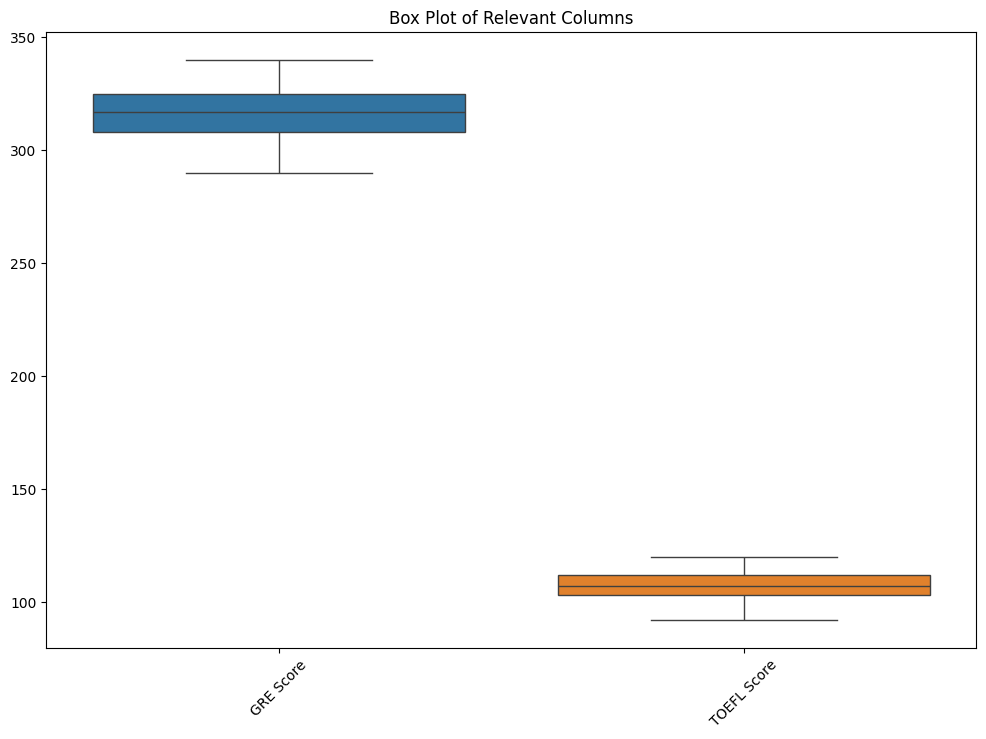

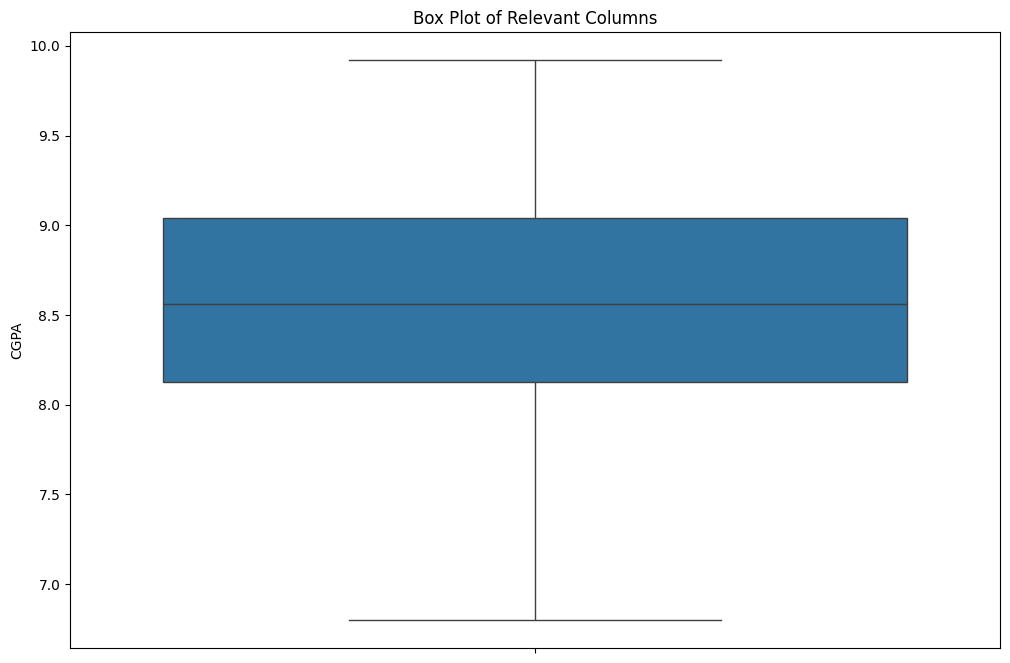

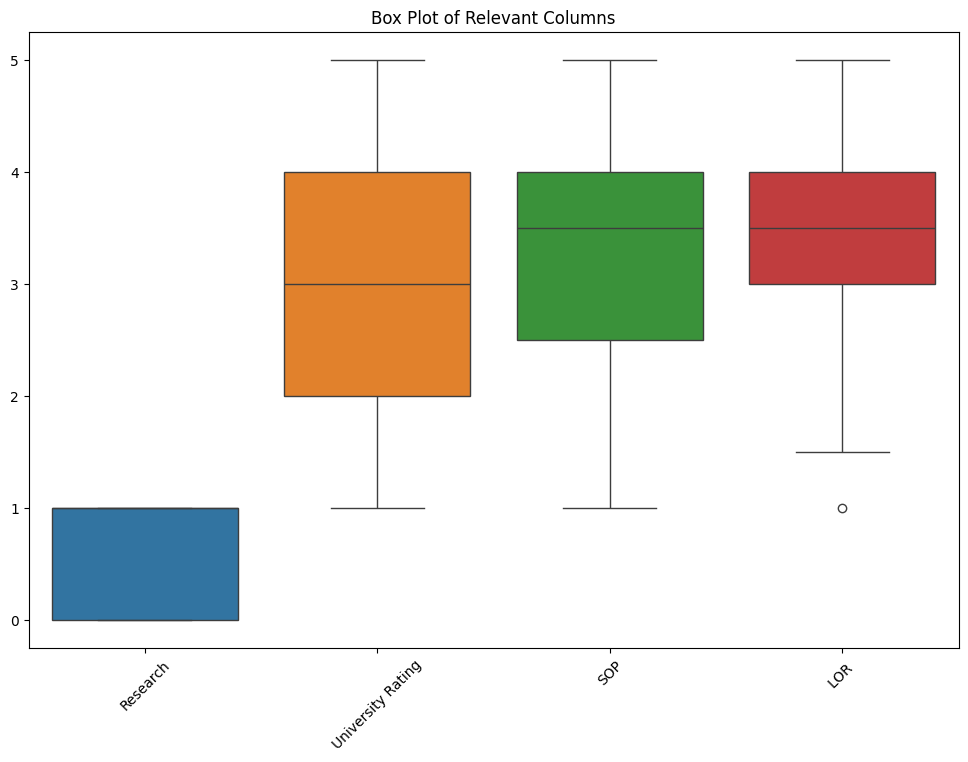

In [50]:
# Visualizing distribution of data points using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataframe[['GRE Score', 'TOEFL Score']])
plt.title('Box Plot of Relevant Columns')
plt.xticks(rotation=45)
plt.show()

# Visualizing distribution of data points using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataframe['CGPA'])
plt.title('Box Plot of Relevant Columns')
plt.xticks(rotation=45)
plt.show()

# Visualizing distribution of data points using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataframe[categorical_vars[:-1]])
plt.title('Box Plot of Relevant Columns')
plt.xticks(rotation=45)
plt.show()


In [51]:
#Outlier treatment
for var in continuous_vars+categorical_vars:
    Q1 = dataframe[var].quantile(0.25)
    Q3 = dataframe[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[var] = dataframe[var].clip(lower=lower_bound, upper=upper_bound)

In [52]:
# Feacture Engineering
dataframe['strength'] = dataframe['SOP'] + dataframe['LOR ']
dataframe.drop(columns=['SOP','LOR '],inplace=True)
dataframe['strength']

0       9.0
1       8.5
2       6.5
3       6.0
4       5.0
       ... 
495     8.5
496    10.0
497     9.5
498     9.0
499     9.0
Name: strength, Length: 500, dtype: float64

In [53]:
dataframe

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit,strength
0,337,118,4,9.65,1,0.92,9.0
1,324,107,4,8.87,1,0.76,8.5
2,316,104,3,8.00,1,0.72,6.5
3,322,110,3,8.67,1,0.80,6.0
4,314,103,2,8.21,0,0.65,5.0
...,...,...,...,...,...,...,...
495,332,108,5,9.02,1,0.87,8.5
496,337,117,5,9.87,1,0.96,10.0
497,330,120,5,9.56,1,0.93,9.5
498,312,103,4,8.43,0,0.73,9.0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [55]:
# Split data into features (X) and target variable (y)
X = dataframe.drop(columns=['Chance of Admit '])
y = dataframe['Chance of Admit ']
columns = X.columns
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
X_train

array([[ 0.40128156,  0.62675052, -0.09979274,  0.41965703,  0.88640526,
         0.36760129],
       [-0.0418297 ,  0.62675052,  0.77558214, -0.06031039, -1.12815215,
         1.22782272],
       [-1.193919  , -0.8545401 , -0.09979274, -0.12651279, -1.12815215,
        -0.20587966],
       ...,
       [-1.28254125, -1.34830364, -1.85054249, -2.19533785, -1.12815215,
        -1.63958204],
       [-0.66218548, -0.36077656, -0.97516761, -1.48366203, -1.12815215,
        -0.20587966],
       [-0.21907421, -0.19618871, -0.97516761, -0.5402778 , -1.12815215,
         0.36760129]])

#Model building

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
# Build Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions train data
y_train_pred = linear_reg.predict(X_train)

threshold = 0.5  # Set the threshold value (adjust as needed)

# Convert predicted probabilities to binary labels
y_train_pred = [1 if prob >= threshold else 0 for prob in y_train_pred]



In [58]:
coefficients = linear_reg.coef_
coefficients

array([0.02724941, 0.0171936 , 0.00170568, 0.06804298, 0.01188039,
       0.01769839])

In [59]:
# Display model coefficients with column names
coefficients = linear_reg.coef_
coefficients_df = pd.DataFrame({'Feature': columns, 'Coefficient': coefficients})
print("\nLinear Regression Coefficients:")
print(coefficients_df)


Linear Regression Coefficients:
             Feature  Coefficient
0          GRE Score     0.027249
1        TOEFL Score     0.017194
2  University Rating     0.001706
3               CGPA     0.068043
4           Research     0.011880
5           strength     0.017698


In [60]:
# Model statistics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_rmse,train_r2

(0.3047628176139603, -3.7171978190666364)

###### Root mean square error and r2 are good for train dataset.

In [61]:
# Lasso Regression
lasso_reg = Lasso(alpha=1)  # The alpha parameter for regularization strength
lasso_reg.fit(X_train, y_train)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_reg.predict(X_train)))
lasso_train_r2 = r2_score(y_train, lasso_reg.predict(X_train))

print("Losso Regression Model Statistics:")
print("Train RMSE:", lasso_train_rmse)
print("Train R^2 Score:", lasso_train_r2)

Losso Regression Model Statistics:
Train RMSE: 0.1403201161630078
Train R^2 Score: 0.0


In [62]:
# Ridge Regression
ridge_reg = Ridge(alpha=0.5)  # You can adjust the alpha parameter for regularization strength
ridge_reg.fit(X_train, y_train)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train)))
ridge_train_r2 = r2_score(y_train, ridge_reg.predict(X_train))

print("Ridge Regression Model Statistics:")
print("Train RMSE:", ridge_train_rmse)
print("Train R^2 Score:", ridge_train_r2)

Ridge Regression Model Statistics:
Train RMSE: 0.05960422545786763
Train R^2 Score: 0.8195677243786006


#Testing the assumptions of the linear regression model

In [63]:
#Multicollinearity check by VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Convert trainingDataFrame if they are numpy arrays
X_train_df = pd.DataFrame(X_train)
vif_scores_train = calculate_vif(X_train_df)
print("VIF Scores for Training Data:")
print(vif_scores_train)

VIF Scores for Training Data:
             Feature       VIF
0          GRE Score  4.488243
1        TOEFL Score  3.637750
2  University Rating  2.528933
3               CGPA  4.653647
4           Research  1.517161
5           strength  2.719518


####  There is some degree of multicollinearity present in the dataset, with several variables exhibiting moderate levels of multicollinearity, none of the VIF scores exceed the commonly accepted threshold of 5, suggesting that multicollinearity may not be a significant issue in this model.

In [64]:
# Calculate residuals
residuals = y_train - y_train_pred

# Calculate mean of residuals
mean_residuals = np.mean(residuals)

print("Mean of Residuals:", mean_residuals)


Mean of Residuals: -0.24330000000000002


#### The mean of residuals is close to zero, indicating that the model's predictions are not having multicollinearity and unbiased on average.


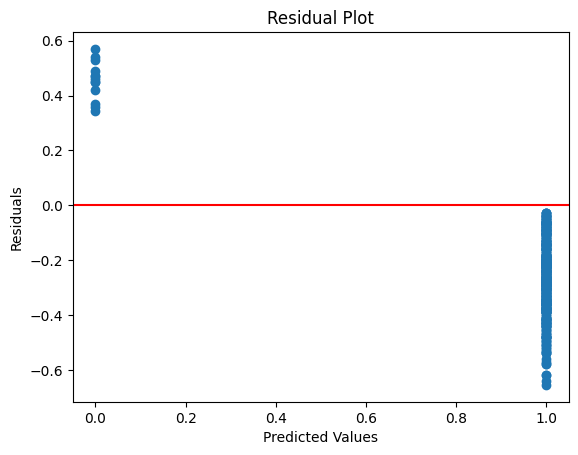

In [65]:
# Create residual plot
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### The absence of any discernible pattern in the residual plot suggests that multicollinearity among the predictor variables is not a significant concern.

In [66]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform Goldfeld-Quandt test
gq_test = het_goldfeldquandt(residuals, X_train)
print("Goldfeld-Quandt Test p-value:", gq_test[1])

Goldfeld-Quandt Test p-value: 0.5671108868327348


#### p-value is more than 0.05.So, there is insufficient evidence to conclude that heteroscedasticity is present in the residuals

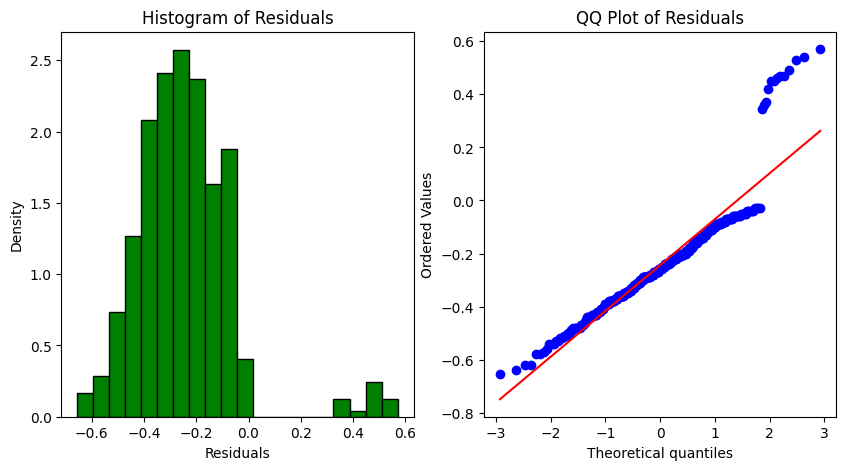

Normality Test p-value: 8.721588421180394e-32


In [67]:
import scipy.stats as stats
# Plot histogram/density plot of residuals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, density=True, color='g', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Plot QQ plot of residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

# Assess normality
normality_result = stats.normaltest(residuals)
print("Normality Test p-value:", normality_result.pvalue)

####  Residuals may visually appear to be in almost a normal distribution.

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_train, y_train_pred)

# Calculate Adjusted R-squared (Adj R2)
n = len(y_train)
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adj_r2)


Mean Absolute Error (MAE): 0.27292500000000003
Root Mean Squared Error (RMSE): 0.3047628176139603
R-squared (R2): -3.7171978190666364
Adjusted R-squared (Adj R2): -3.789216106380631


The MAE and RMSE values are relatively low, suggesting that the model's predictions are close to the actual values.
The R-squared and Adjusted R-squared values are relatively high, indicating that a large proportion of the variance in the target variable is explained by the model.

In [69]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_test_pred = model.predict(X_test)

threshold = 0.5  # Set the threshold value (adjust as needed)

# Convert predicted probabilities to binary labels
y_test_pred = [1 if prob >= threshold else 0 for prob in y_test_pred]


In [70]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_test_pred)

# Calculate Adjusted R-squared (Adj R2)
n = len(y_test)
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adj_r2)

Mean Absolute Error (MAE): 0.285
Root Mean Squared Error (RMSE): 0.31685012229759363
R-squared (R2): -3.9092420537897317
Adjusted R-squared (Adj R2): -4.225967347582618


The model performs well on both the training and test data, with similar performance metrics observed between the two datasets. This suggests that the model generalizes well to unseen data, indicating robustness and reliability in its predictions.

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

The R-squared and Adjusted R-squared values indicate that a significant proportion of the variance in the target variable is explained by the predictor variables.
#Additional Data Sources for Model Improvement


*   For applicants with relevant work experience, details about their professional background, responsibilities, and achievements could be informative for admissions decisions.
*   Information about extracurricular involvement, leadership roles, community service, or internships could offer a more comprehensive view of the applicant's interests and achievements.


*    Feedback from admission interviews
#Model Implementation in the Real World


*   Data Gathering: We collect info on GPA, test scores, activities, etc., tailored to Indian applicants' Ivy League chances.

*   Feature Selection: Picking the key factors that influence admission, like academics and extracurriculars.

*   Model Choice: We select a smart algorithm (linear regression) that learns from past data to predict chances accurately.
*   Training: Teaching the model with real-life data to make it good at guessing admission probabilities.

*   Testing: We check if the model works well using tests and real examples to ensure reliability.
*   Launch: Once confident, we integrate it into our website, making it easy for students to use.

*   Feedback Loop: We listen to users and update the model regularly for accuracy and relevance
*   Support: Our team is here to help students understand their chances and navigate the process.












#potential business benefits from improving the model

*   A reputation for excellence in admissions prediction can attract partnerships with educational institutions, test prep providers, and other industry stakeholders, creating new revenue streams and business opportunities.
*   As the model improves, we gain valuable insights into student behavior and preferences, informing product development, marketing strategies, and personalized offerings.

*    When our model provides more accurate predictions, it boosts trust and satisfaction among users, leading to positive word-of-mouth and increased customer loyalty.
*   Satisfied customers are more likely to invest in our premium services, driving revenue growth and expanding our customer base.

*   Long-term Sustainability: Continuous improvement of our model ensures that Jamboree remains relevant and competitive in the evolving market, supporting long-term growth and sustainability.





